In [1]:
# Importing Necessary Libraries
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# confirm that our new database was created
mongo.list_database_names()

['admin',
 'autosaurus',
 'classDB',
 'config',
 'epa',
 'fruits_db',
 'garden_db',
 'local',
 'met',
 'petsitly_marketing',
 'team_1_db',
 'travel_db',
 'uk_food',
 'wine']

In [4]:
db = mongo['wine']
db.list_collection_names()

['ratings']

In [5]:
#assign the collection to a variable
wine_df = db['ratings']

In [6]:
cursor = db["ratings"].find({})
json_data = list(cursor)

In [9]:
wine_df = pd.DataFrame(json_data)
wine_df.head()

,_id,country,description,points,price,province,region,title,variety,winery,rating_category,type,vintage
0,663af692e8d6239274b71533,France,This has great depth of flavor with its fresh ...,87,27,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,Good,White,2012
1,663af692e8d6239274b71534,US,"Rustic and dry, this has flavors of berries, c...",86,50,California,Dry Creek Valley,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve,Good,Red,2010
2,663af692e8d6239274b71535,US,"Soft, supple plum envelopes an oaky structure ...",87,19,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Good,Red,2011
3,663af692e8d6239274b71536,US,"This shows a tart, green gooseberry flavor tha...",86,20,California,Sonoma Valley,Envolve 2011 Sauvignon Blanc (Sonoma Valley),Sauvignon Blanc,Envolve,Good,White,2011
4,663af692e8d6239274b71537,Italy,This concentrated Cabernet offers aromas of cu...,86,21,Sicily & Sardinia,Sicilia,Feudi del Pisciotto 2010 Missoni Cabernet Sauv...,Cabernet Sauvignon,Feudi del Pisciotto,Good,Red,2010


In [10]:
# Drop the non-beneficial ID columns
wine_df = wine_df.drop(columns = ['_id','description','title', 'winery', 'region'])
wine_df.head()

,country,points,price,province,variety,rating_category,type,vintage
0,France,87,27,Alsace,Pinot Gris,Good,White,2012
1,US,86,50,California,Red Blend,Good,Red,2010
2,US,87,19,California,Cabernet Sauvignon,Good,Red,2011
3,US,86,20,California,Sauvignon Blanc,Good,White,2011
4,Italy,86,21,Sicily & Sardinia,Cabernet Sauvignon,Good,Red,2010


In [11]:
wine_df['target'] =wine_df['points']>=90
wine_df.tail()

,country,points,price,province,variety,rating_category,type,vintage,target
77926,US,90,20,California,Chardonnay,Very Good,White,2013,True
77927,France,90,28,Alsace,Pinot Gris,Very Good,White,2013,True
77928,France,90,57,Alsace,Pinot Gris,Very Good,White,2010,True
77929,US,90,35,California,Chardonnay,Very Good,White,2013,True
77930,US,90,75,Oregon,Pinot Noir,Very Good,Red,2004,True


In [12]:
wine_df = wine_df.drop(columns = ['points','rating_category', 'province', 'type'])

In [13]:
wine_df.head()

,country,price,variety,vintage,target
0,France,27,Pinot Gris,2012,False
1,US,50,Red Blend,2010,False
2,US,19,Cabernet Sauvignon,2011,False
3,US,20,Sauvignon Blanc,2011,False
4,Italy,21,Cabernet Sauvignon,2010,False


In [14]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77931 entries, 0 to 77930
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  77931 non-null  object
 1   price    77931 non-null  int64 
 2   variety  77931 non-null  object
 3   vintage  77931 non-null  object
 4   target   77931 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 2.5+ MB


In [15]:
wine_df['vintage'].unique()

array(['2012', '2010', '2011', '2009', '2013', '2015', '2014', 'No Year',
       '2007', '2016', '2008', '2003', '2001', '2004', '2006', '2005',
       '2002', '1887', '1999', '1991', '1997', '2000', '2017', '1996',
       '1998', '1995', '1994', '1992', '1990', '1988', '1872', '1989',
       '1993', '1882', '1985', '1904', '1986', '1987', '1919', '1945'],
      dtype=object)

In [17]:
wine_df['vintage'] = wine_df['vintage'].replace('No Year', pd.NA)
wine_df.head()

,country,price,variety,vintage,target
0,France,27,Pinot Gris,2012,False
1,US,50,Red Blend,2010,False
2,US,19,Cabernet Sauvignon,2011,False
3,US,20,Sauvignon Blanc,2011,False
4,Italy,21,Cabernet Sauvignon,2010,False


In [18]:
wine_df['vintage'].unique()

array(['2012', '2010', '2011', '2009', '2013', '2015', '2014', <NA>,
       '2007', '2016', '2008', '2003', '2001', '2004', '2006', '2005',
       '2002', '1887', '1999', '1991', '1997', '2000', '2017', '1996',
       '1998', '1995', '1994', '1992', '1990', '1988', '1872', '1989',
       '1993', '1882', '1985', '1904', '1986', '1987', '1919', '1945'],
      dtype=object)

In [19]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77931 entries, 0 to 77930
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  77931 non-null  object
 1   price    77931 non-null  int64 
 2   variety  77931 non-null  object
 3   vintage  75256 non-null  object
 4   target   77931 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 2.5+ MB


In [20]:
wine_df.dropna()

,country,price,variety,vintage,target
0,France,27,Pinot Gris,2012,False
1,US,50,Red Blend,2010,False
2,US,19,Cabernet Sauvignon,2011,False
3,US,20,Sauvignon Blanc,2011,False
4,Italy,21,Cabernet Sauvignon,2010,False
...,...,...,...,...,...
77926,US,20,Chardonnay,2013,True
77927,France,28,Pinot Gris,2013,True
77928,France,57,Pinot Gris,2010,True
77929,US,35,Chardonnay,2013,True


In [22]:
# Convert categorical data to numeric with `pd.get_dummies`
wine_dummies_df = pd.get_dummies(wine_df, dtype = int)
wine_dummies_df.head()

,price,target,country_Argentina,country_Australia,country_Canada,country_France,country_Italy,country_Spain,country_US,variety_Bordeaux-style Red Blend,...,vintage_2008,vintage_2009,vintage_2010,vintage_2011,vintage_2012,vintage_2013,vintage_2014,vintage_2015,vintage_2016,vintage_2017
0,27,False,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,50,False,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,19,False,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,20,False,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,21,False,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [24]:
wine_dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77931 entries, 0 to 77930
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   price                             77931 non-null  int64
 1   target                            77931 non-null  bool 
 2   country_Argentina                 77931 non-null  int32
 3   country_Australia                 77931 non-null  int32
 4   country_Canada                    77931 non-null  int32
 5   country_France                    77931 non-null  int32
 6   country_Italy                     77931 non-null  int32
 7   country_Spain                     77931 non-null  int32
 8   country_US                        77931 non-null  int32
 9   variety_Bordeaux-style Red Blend  77931 non-null  int32
 10  variety_Cabernet Franc            77931 non-null  int32
 11  variety_Cabernet Sauvignon        77931 non-null  int32
 12  variety_Champagne Blend         

## Deep Learning

In [25]:
# Split our preprocessed data into our features and target arrays
y = wine_dummies_df['target']
X = wine_dummies_df.drop (columns = 'target')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=68))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

/Users/thaake/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │         1,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,393 (5.44 KB)

 Trainable params: 1,393 (5.44 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 1s 245us/step - accuracy: 0.6705 - loss: 0.6244
Epoch 2/100
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.7502 - loss: 0.5115
Epoch 3/100
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.7517 - loss: 0.5036
Epoch 4/100
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.7521 - loss: 0.5003
Epoch 5/100
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.7543 - loss: 0.4959
Epoch 6/100
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.7560 - loss: 0.4913
Epoch 7/100
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.7561 - loss: 0.4903
Epoch 8/100
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.7585 - loss: 0.4885
Epoch 9/100
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.7521 - loss: 0.4975
Epoch 10/100
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.7598 - loss: 0.4873
Epoch 11/100
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.7637 - loss: 0.48

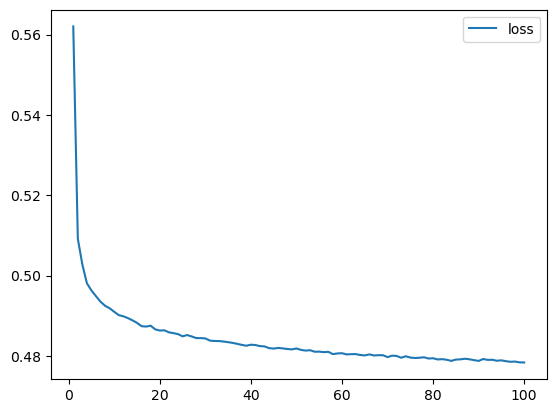

In [51]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

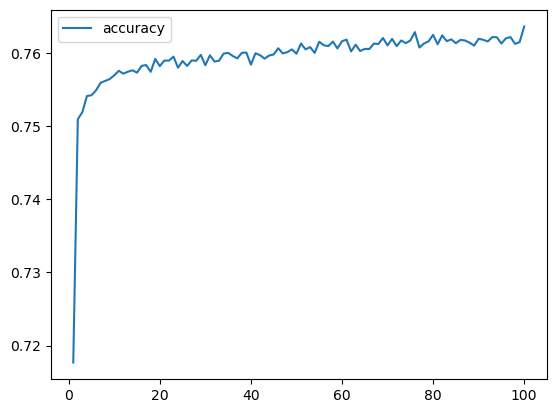

In [52]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

609/609 - 0s - 278us/step - accuracy: 0.7531 - loss: 0.5001
Loss: 0.5001154541969299, Accuracy: 0.7530667781829834


## Saving Scaler and Scaled Data

In [44]:
# Save Scaler for Flask predictions
import joblib
joblib.dump(X_scaler, '../../Flask_app/static/resources/X_scaler.bin', compress=True)

['../../Flask_app/static/resources/X_scaler.bin']

In [28]:
# Create series of indicies to merge with scaled data
X_test_index = X_test.reset_index()['index']
X_test_index

0        27137
1        66081
2        47734
3        54891
4        67218
         ...  
19478     3244
19479    39751
19480    35320
19481    70090
19482    22223
Name: index, Length: 19483, dtype: int64

In [33]:
# Create dataframe of scaled data and add original wine_df index and target value (ytest)
scaled_data_df= pd.DataFrame(X_test_scaled)
scaled_data_df['index'] = X_test_index
scaled_data_df['target'] = y_test.reset_index(drop = True)
scaled_data_df

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,index,target
0,1.260076,-0.201981,-0.128402,-0.052063,-0.467689,-0.368294,-0.212048,0.816607,-0.265953,-0.126181,...,-0.326613,-0.324460,-0.386783,2.627696,-0.376307,-0.265695,-0.151121,-0.00585,27137,False
1,-0.438466,-0.201981,-0.128402,-0.052063,2.138173,-0.368294,-0.212048,-1.224579,3.760059,-0.126181,...,-0.326613,-0.324460,-0.386783,-0.380561,2.657403,-0.265695,-0.151121,-0.00585,66081,True
2,0.014478,-0.201981,-0.128402,-0.052063,2.138173,-0.368294,-0.212048,-1.224579,-0.265953,-0.126181,...,-0.326613,-0.324460,-0.386783,-0.380561,-0.376307,-0.265695,-0.151121,-0.00585,47734,False
3,0.467423,-0.201981,-0.128402,-0.052063,-0.467689,-0.368294,-0.212048,0.816607,-0.265953,-0.126181,...,-0.326613,-0.324460,-0.386783,-0.380561,-0.376307,3.763714,-0.151121,-0.00585,54891,True
4,0.127715,-0.201981,-0.128402,-0.052063,-0.467689,-0.368294,-0.212048,0.816607,-0.265953,-0.126181,...,-0.326613,-0.324460,-0.386783,2.627696,-0.376307,-0.265695,-0.151121,-0.00585,67218,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19478,0.467423,-0.201981,-0.128402,-0.052063,-0.467689,2.715224,-0.212048,-1.224579,-0.265953,-0.126181,...,-0.326613,-0.324460,-0.386783,-0.380561,-0.376307,-0.265695,-0.151121,-0.00585,3244,False
19479,-0.234641,-0.201981,-0.128402,-0.052063,-0.467689,-0.368294,-0.212048,0.816607,-0.265953,-0.126181,...,-0.326613,3.082047,-0.386783,-0.380561,-0.376307,-0.265695,-0.151121,-0.00585,39751,False
19480,-0.211994,-0.201981,-0.128402,-0.052063,-0.467689,-0.368294,-0.212048,0.816607,-0.265953,-0.126181,...,-0.326613,-0.324460,-0.386783,-0.380561,-0.376307,-0.265695,-0.151121,-0.00585,35320,False
19481,0.240951,-0.201981,-0.128402,-0.052063,-0.467689,2.715224,-0.212048,-1.224579,-0.265953,-0.126181,...,3.061724,-0.324460,-0.386783,-0.380561,-0.376307,-0.265695,-0.151121,-0.00585,70090,False


In [41]:
# Save sacled data to CSV to use in Flask App
scaled_data_df.to_csv('../../Flask_app/static/resources/scaled_data_df.csv', index=False)

## Keras Tuner

In [54]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [58]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=68))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [59]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

Reloading Tuner from ./untitled_project/tuner0.json


In [60]:
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 56 Complete [00h 00m 14s]
val_accuracy: 0.7455730438232422

Best val_accuracy So Far: 0.7555304765701294
Total elapsed time: 00h 06m 13s


In [61]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'relu', 'first_units': 16, 'num_layers': 2, 'units_0': 11, 'units_1': 11, 'units_2': 11, 'units_3': 1, 'units_4': 6, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0038'}
{'activation': 'relu', 'first_units': 16, 'num_layers': 3, 'units_0': 26, 'units_1': 11, 'units_2': 26, 'units_3': 6, 'units_4': 21, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0017'}
{'activation': 'tanh', 'first_units': 26, 'num_layers': 1, 'units_0': 6, 'units_1': 21, 'units_2': 1, 'units_3': 6, 'units_4': 16, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0046'}


In [62]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

609/609 - 0s - 301us/step - accuracy: 0.7555 - loss: 0.5010
Loss: 0.5010472536087036, Accuracy: 0.7555304765701294
609/609 - 0s - 297us/step - accuracy: 0.7551 - loss: 0.5016
Loss: 0.5015764832496643, Accuracy: 0.7551198601722717
609/609 - 0s - 283us/step - accuracy: 0.7551 - loss: 0.4987
Loss: 0.4986639618873596, Accuracy: 0.7551198601722717


In [64]:
# Saves model locally
nn_model.save('model.h5')

In [ ]:
# # Get second best model hyperparameters
# second_hyper = tuner.get_best_hyperparameters(2)[1]
# second_hyper.values

In [ ]:
# # Compare the performance to the second-best model
# second_model = tuner.get_best_models(2)[1]
# model_loss, model_accuracy = second_model.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

## K Nearest Neighbors Pipeline

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [28]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

ML_classifier = KNeighborsClassifier(n_neighbors=3)

In [29]:
# Create a pipeline with preprocessing and KNeighborsClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier',ML_classifier )
])

In [30]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [31]:
# Predict using the pipeline
y_pred = pipeline.predict(X_test)

In [32]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.76      0.78      0.77     11667
        True       0.66      0.64      0.65      7816

    accuracy                           0.72     19483
   macro avg       0.71      0.71      0.71     19483
weighted avg       0.72      0.72      0.72     19483



### AdaBoost 
In adherence to the DRY (Don't Repeat Yourself) principle, we will build a function to streamline the creation of our modeling pipeline. This approach enhances code maintainability and readability.

In [33]:
# Create a pipeline with preprocessing and KNeighborsClassifier
def set_and_train_pipeline (scaler,ML_classifier):
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier',ML_classifier )
])

    # fit the pipeline
    pipeline.fit(X_train, y_train)

    # Predict using the pipeline
    y_pred_test = pipeline.predict(X_test)

    # Predict using the pipeline
    y_pred_train = pipeline.predict(X_train)

    # Print the classification report
    print("****** TRAINING Classification Report ******\n",
          classification_report(y_train, y_pred_train))

    print("****** TEST Classification Report ******\n",
          classification_report(y_test, y_pred_test))

    # return the pipeline
    return pipeline

In [34]:
# Fit the pipeline to the training data

from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=800, learning_rate=0.03, random_state=1)  # Adjust hyperparameters as needed
scaler = StandardScaler()

set_and_train_pipeline(scaler,classifier)

****** TRAINING Classification Report ******
               precision    recall  f1-score   support

       False       0.77      0.81      0.79     34721
        True       0.70      0.65      0.68     23727

    accuracy                           0.75     58448
   macro avg       0.74      0.73      0.73     58448
weighted avg       0.74      0.75      0.74     58448

****** TEST Classification Report ******
               precision    recall  f1-score   support

       False       0.78      0.81      0.79     11667
        True       0.70      0.66      0.68      7816

    accuracy                           0.75     19483
   macro avg       0.74      0.73      0.74     19483
weighted avg       0.75      0.75      0.75     19483



Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 AdaBoostClassifier(learning_rate=0.03, n_estimators=800,
                                    random_state=1))])

## Logistic Regression

In [35]:
wine_dummies_df.head()

,price,target,country_Argentina,country_Australia,country_Canada,country_France,country_Italy,country_Spain,country_US,variety_Bordeaux-style Red Blend,...,vintage_2008,vintage_2009,vintage_2010,vintage_2011,vintage_2012,vintage_2013,vintage_2014,vintage_2015,vintage_2016,vintage_2017
0,14,False,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,13,False,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,65,False,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,27,False,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,19,False,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
# Separate the features from the target.
y = wine_dummies_df["target"]
X = wine_dummies_df.drop(columns="target")

In [37]:
# Split the data into training and testing data. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,
                                                    stratify=y
)
X_train.shape

(58448, 68)

In [38]:
# Create a logistic regression classifier. 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver="lbfgs",max_iter=200, random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [39]:
 # Train the model 
classifier.fit(X_train, y_train)

/Users/thaake/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=1)

In [40]:
# Get the training and testing data score.
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.7417533534081577
0.7430067238105015


In [41]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,False,False
1,True,True
2,False,True
3,False,True
4,False,False
5,False,False
6,True,True
7,False,False
8,False,False
9,True,True
